<a href="https://colab.research.google.com/github/galeisan/data_analysis/blob/main/%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82_%D0%BF%D0%BE_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%D1%83_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
Набор данных: ONLINEADS, 13 переменных 20000 строк

Описание: Международная бизнес-площадка запустила тестовую рекламу в интернете на жителей Москвы и Санкт-Петербурга. 
После проведения рекламной кампании были собраны данные о пользователях перешедших на сайт.

Цель: ислледование наилучшей модели для предсказания какие пользователи в будущем 
будут регистрироваться на площадке

Описание признаков: 
1) ID                                          
2) Age:                                       
    18‑24 года = 0  
    25‑34 года = 1 
    35‑44 года = 2 
    45-54 года = 3 
    55 лет и старше = 4
3) Gender: Неизв = 0, М = 1, Ж = 2              
4) Interest:                                    
    Бизнес = 0           Автомобили = 5
    Литература = 1       Кулинария = 6 
    Кино = 2             Недвижимость = 7 
    Семья и дети = 3     Обустройство = 8
    Туризм = 4           Мобильная связь и интернет = 9
5) VisitTime : Каждое число из набора данных соответствует определенному часу.
6) City: Москва = 0,  Санкт-Петербург  = 1
7) Device: ПК = 0, Смартфон = 1
8) OC : Mac OS = 0, Windows = 1, Android = 2, IOS = 3
9) VisitPage : Главная страница = 0, Специально разработанная для рекламной кампании страница = 1
10) AdsTool(Источник перехода): Таргетированная реклама = 0, Контекстная реклама = 1, Прямые переходы = 2, SEO = 3, Социальные сети = 4, Остальные = 5
11) VisitNumber(Является ли переход на сайт первым визитом посетителя? )
    Новые посетители = 0, Вернувшиеся посетители = 1
12) ViewedPage(Количество просмотренных страниц перед регистрацией):
    32-63 страниц = 0  2-3 страниц = 4 
    16-31 страниц = 1  1 страниц = 5 
    8-15 страниц = 2   Остальные = 6
    4-7 страниц = 3 
13) Registration(Пользователь зарегистрировался?) Да = 1, Нет = 0

```



# ЧАСТЬ 1

In [ ]:
!pip install --upgrade scikit-learn==0.20.3

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style('whitegrid')

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
   print('User uploaded file «{name}» with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving ONLINEADS.xlsx to ONLINEADS.xlsx
User uploaded file «ONLINEADS.xlsx» with length 2160730 bytes


In [ ]:
dataframe = pd.read_excel("ONLINEADS.xlsx")

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Client ID     20000 non-null  float64
 1   Age           20000 non-null  float64
 2   Gender        20000 non-null  float64
 3   Interest      20000 non-null  float64
 4   VisitTime     20000 non-null  float64
 5   City          20000 non-null  float64
 6   Device        20000 non-null  float64
 7   OS            20000 non-null  float64
 8   VisitPage     20000 non-null  float64
 9   AdsTool       20000 non-null  float64
 10  VisitNumber   20000 non-null  float64
 11  ViewedPage    20000 non-null  float64
 12  Registration  20000 non-null  float64
dtypes: float64(13)
memory usage: 2.0 MB


Уберем колонку с айдишниками

In [ ]:
dataframe = dataframe.drop(columns =["Client ID"])

Проверим, есть ли дубликаты

In [ ]:
repeated_values = dataframe[dataframe.duplicated()]
repeated_values.count()

Age             423
Gender          423
Interest        423
VisitTime       423
City            423
Device          423
OS              423
VisitPage       423
AdsTool         423
VisitNumber     423
ViewedPage      423
Registration    423
dtype: int64

Удаляем дублирующиеся строки

In [ ]:
dataframe1 = dataframe.drop_duplicates(keep = 'first')

In [ ]:
repeated_values = dataframe1[dataframe1.duplicated()]
repeated_values.count()

Age             0
Gender          0
Interest        0
VisitTime       0
City            0
Device          0
OS              0
VisitPage       0
AdsTool         0
VisitNumber     0
ViewedPage      0
Registration    0
dtype: int64

Посмотрим распределение значений переменных


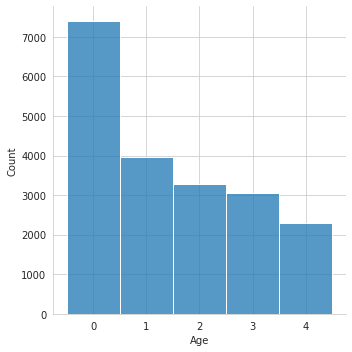

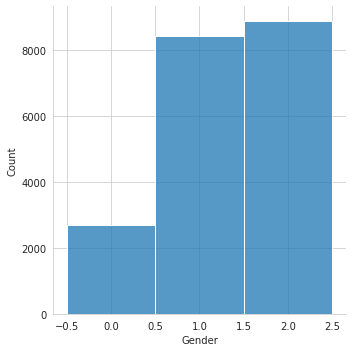

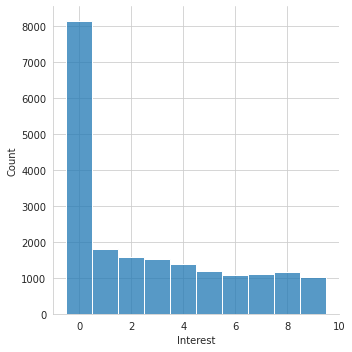

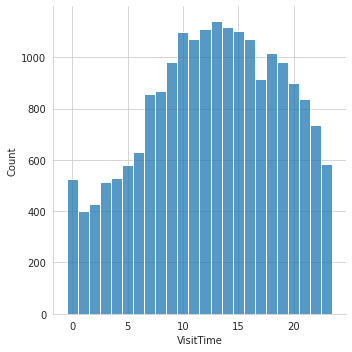

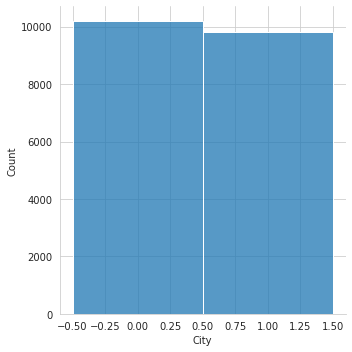

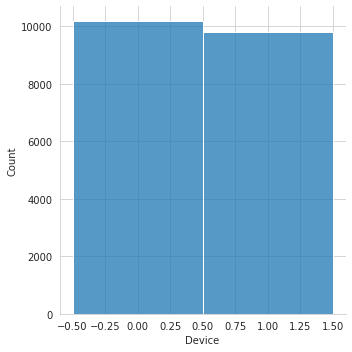

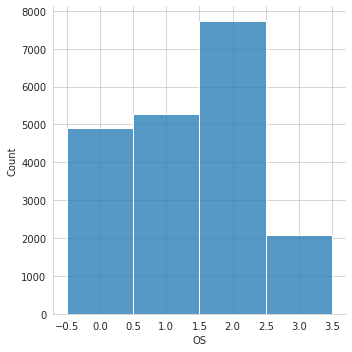

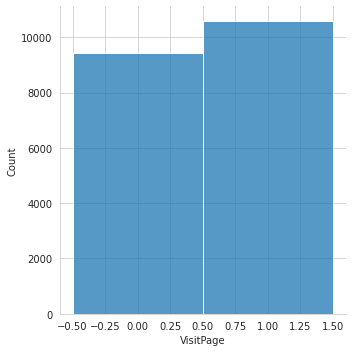

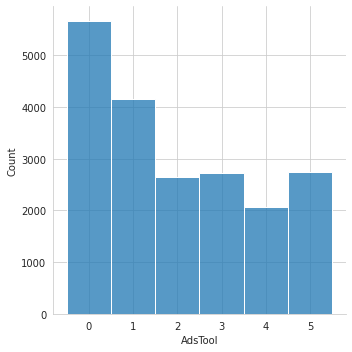

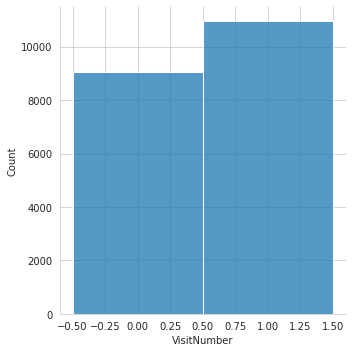

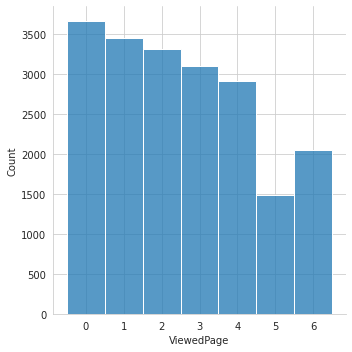

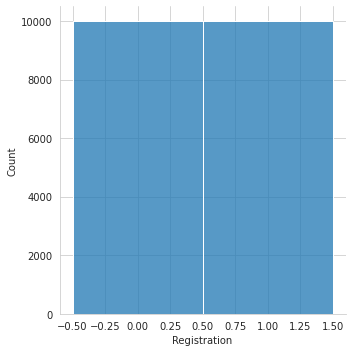

In [ ]:
for column in dataframe.columns:
  sns.displot(data=dataframe[column], discrete=True)

Сделаем выводы из полученных распределений

1. Возраст: около 37% людей из категории 18‑24.
2. Пол: не намного больше персон женского пола, менее 1.5% предпочли не указывать свой пол.
3. Интересы: около 40% посетителей интересуются бизнесом.
4. Время посещения: очевидно, бОльшая часть посетителей переходят на сайт днем, пик посещений приходится примерно на 13 часов.
5. Город: немного больше посетителей из Москвы.
6. Устройство: примерно одинаковое количество посетителей ПК и смартфонов.
7. ОС: около 35% пользуются андроидом. Виндовс и макос пользуется примерно одинаковое количество человек.
8. Страница посещений: больше 50% посещений сайта связаны с рекламной страницей
9. Способ привлечения: около половины посетителей были привлечены с помощью таргетированной и контекстной реклам.
10. Является ли переход на сайт первым визитом человека? около 45% посетителей были на сайте впервые
11. Количество просмотренных страниц перед регистрацией: бОльшая часть посетителей посмотрела 32-63 страницы.
12. Регистрация: половина посетителей зарегистрировалась.

Посмотрим как переменные влияют друг на друга

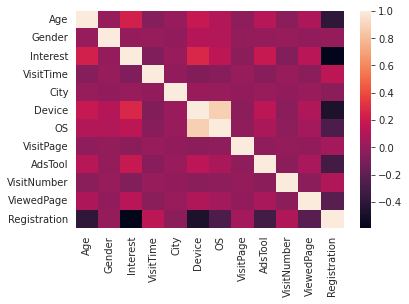

In [ ]:
ax = sns.heatmap(dataframe.corr())

На тепловой карте заметим какие переменные значительно выделяются своим влиянием на регистрацию это: возраст, интерес, девайс, источник перехода

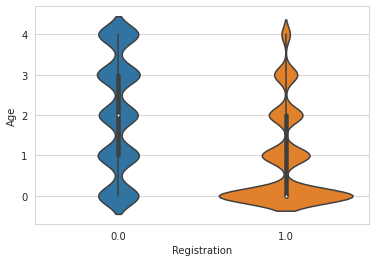

In [ ]:
sns.violinplot(x="Registration", y = "Age", data=dataframe)

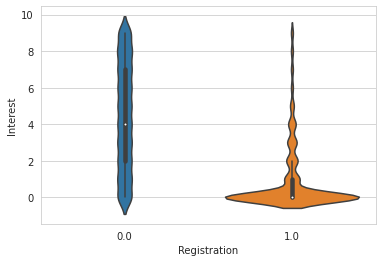

In [ ]:
sns.violinplot(x="Registration", y = "Interest", data=dataframe)

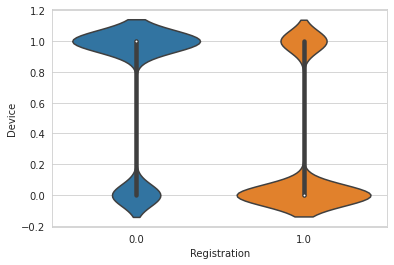

In [ ]:
sns.violinplot(x="Registration", y = "Device", data=dataframe)

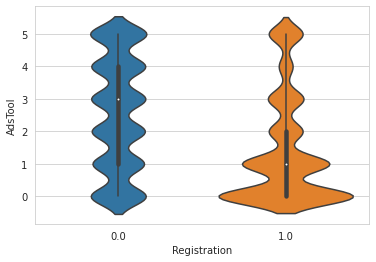

In [ ]:
sns.violinplot(x="Registration", y = "AdsTool", data=dataframe)

1. Возраст: больше всего регистрируются люди 18‑24 лет
2. Интерес: больше всего регистрируются люди, интересующиеся бизнесом
3. Девайс: чаще люди регистрируются с ПК
4. Источник перехода: таргетированная реклама эффективнее привлекает новых пользователей

# ЧАСТЬ 2

## Разработка моделей

###Разделяем данные на выборки

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
y = dataframe1["Registration"]
X = dataframe1.drop('Registration', axis=1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Метод k ближайших соседей

Этот алгоритм является самым базовым алгоритмом классификации

In [ ]:
dataframe.describe()

,Age,Gender,Interest,VisitTime,City,Device,OS,VisitPage,AdsTool,VisitNumber,ViewedPage,Registration
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,1.444550,1.308550,2.686650,12.566800,0.490250,0.490800,1.350200,0.529300,1.978850,0.547950,2.542000,0.500000
std,1.408483,0.695752,2.997684,6.110156,0.499917,0.499928,0.962084,0.499153,1.767048,0.497708,1.914764,0.500013
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,8.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,2.000000,13.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,2.000000,0.500000
75%,3.000000,2.000000,5.000000,18.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,4.000000,1.000000
max,4.000000,2.000000,9.000000,23.000000,1.000000,1.000000,3.000000,1.000000,5.000000,1.000000,6.000000,1.000000


Видим, что в столбце VisitTime среднее значение намного больше, чем в других столбцах. Чтобы этот столбец не так сильно влиял на модель, разделим каждое значение на 10

In [ ]:
dataframe1['VisitTime'] = dataframe1['VisitTime'].div(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dataframe1.describe()

,Age,Gender,Interest,VisitTime,City,Device,OS,VisitPage,AdsTool,VisitNumber,ViewedPage,Registration
count,19577.000000,19577.000000,19577.000000,19577.000000,19577.000000,19577.000000,19577.000000,19577.000000,19577.000000,19577.000000,19577.000000,19577.000000
mean,1.464933,1.307197,2.736119,1.253864,0.491138,0.497318,1.358635,0.527098,2.003933,0.544465,2.556265,0.490882
std,1.409477,0.698549,3.003938,0.614013,0.499934,0.500006,0.963500,0.499278,1.768109,0.498032,1.919751,0.499930
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.800000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,2.000000,1.300000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,2.000000,0.000000
75%,3.000000,2.000000,5.000000,1.800000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,4.000000,1.000000
max,4.000000,2.000000,9.000000,2.300000,1.000000,1.000000,3.000000,1.000000,5.000000,1.000000,6.000000,1.000000


Cоздаем объект-экземпляр класса, задавая
параметры, например, количество соседей, которое будем использовать
для классификации.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=6)

Затем подгоняем классификатор, используя обучающий набор. Для
KNeighborsClassifier это означает запоминание набора данных, таким
образом, мы можем вычислить соседей в ходе прогнозирования.

In [ ]:
clf = clf.fit(X_train, y_train)

Чтобы получить прогнозы для тестовых данных, мы вызываем метод
predict. Для каждой точки тестового набора он вычисляет ее ближайших
соседей в обучающем наборе и находит среди них наиболее часто
встречающийся класс

In [ ]:
train_predict = clf.predict(X_test)

Для оценки обобщающей способности модели мы вызываем метод
score с тестовыми данными и тестовыми метками:

In [ ]:
clf.score(X_test, y_test)

0.8571671773918965

Выясним, существует ли взаимосвязь между сложностью
модели и обобщающей способностью. Оценим качество работы модели на обучающем и тестовом наборах с использованием разного количества соседей.

In [ ]:
from matplotlib import pyplot as plt

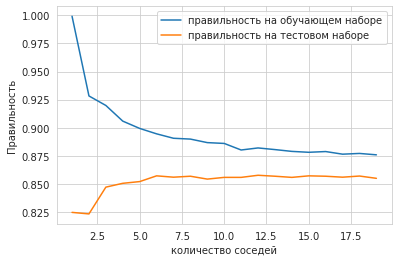

In [ ]:
training_accuracy = []
test_accuracy = []
# пробуем n_neighbors от 1 до 10
neighbors_settings = range(1, 20)
for n_neighbors in neighbors_settings:
# строим модель
  clf = KNeighborsClassifier(n_neighbors=n_neighbors)
  clf.fit(X_train, y_train)
  # записываем правильность на обучающем наборе
  training_accuracy.append(clf.score(X_train, y_train))
  # записываем правильность на тестовом наборе
  test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="правильность на обучающем наборе")
plt.plot(neighbors_settings, test_accuracy, label="правильность на тестовом наборе")
plt.ylabel("Правильность")
plt.xlabel("количество соседей")
plt.legend()

Оптимальное качество работы модели наблюдается где-то посередине,
когда используются 6 соседей.

### Модель логистической регрессии

Обучаем модель

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg = LogisticRegression(max_iter=1000)

In [ ]:
log_reg = log_reg.fit(X_train, y_train)


In [ ]:
train_predict = log_reg.predict_proba(X_train)
test_predict = log_reg.predict_proba(X_test)

In [ ]:
test_predict[:10, :]

array([[0.80504389, 0.19495611],
       [0.92404437, 0.07595563],
       [0.00780435, 0.99219565],
       [0.99025517, 0.00974483],
       [0.1919493 , 0.8080507 ],
       [0.96143163, 0.03856837],
       [0.30807913, 0.69192087],
       [0.0618102 , 0.9381898 ],
       [0.22070753, 0.77929247],
       [0.03163027, 0.96836973]])

В первом столбце - вероятность того, что пользователь не зарегистрируется, во втором, что зарегистрируется.

Посмотрим на распределение предсказанной классификатором вероятности регистрации

In [ ]:
train_predict = train_predict[:, 1]

In [ ]:
test_predict = test_predict[:, 1]

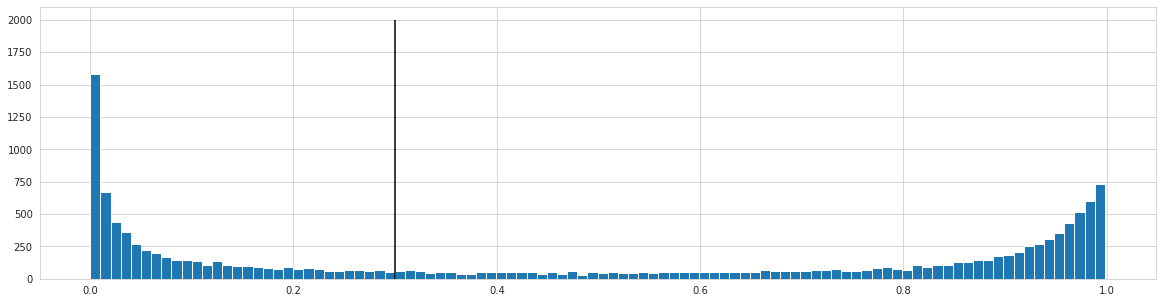

In [ ]:
plt.figure(figsize=(20, 5))

plt.hist(train_predict, bins=100)
plt.vlines(0.3, 0, 2000)

Точность модели на тренировочной выборке

In [ ]:
score = log_reg.score(X_train, y_train)
score

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


0.8779829234474202

Точночсть модели на тестовой выборке

In [ ]:
score = log_reg.score(X_test, y_test)
score

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


0.8721484508001361

Таблица сопряженности модели классификации

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve

In [ ]:
test_predict = log_reg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


In [ ]:
log_reg_conf_matrix = confusion_matrix(y_test, test_predict)
log_reg_conf_matrix = pd.DataFrame(log_reg_conf_matrix)

log_reg_conf_matrix

,0,1
0,2605,390
1,361,2518


338 - предсказали, что пользователь не зарегистрируется, а он зарегистрировался

362 - предсказали, что пользователь зарегистрируется, а он не зарегистрировался

####Построим ROC-кривую

In [ ]:
false_p, true_p, threshold = roc_curve(y_test, test_predict)

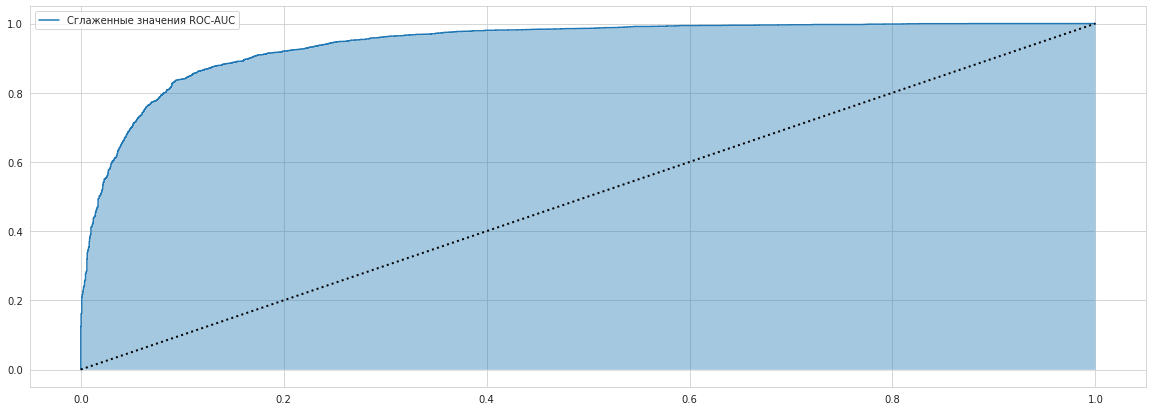

In [ ]:
plt.figure(figsize=(20, 7))
plt.plot(false_p, true_p, label="Сглаженные значения ROC-AUC")
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle=':')
plt.fill_between(false_p, true_p, step='mid', alpha=0.4)
plt.legend()
plt.show()

Площадь под графиком довольно близка к 1, следовательно качество классификации тоже довольно хорошее

### Модель классификации с помощью решающих деревьев

Деревья решений представляют из себя иерархические древовидные структуры, состоящие из решающих правил вида «Если ..., то...». 
К плюсам решающих деревьев можно отнести быстрые процессы обучения и прогнозирования, поддержку и числовых, и категориальных признаков.

In [ ]:
from sklearn.tree import DecisionTreeClassifier # импортируем классификатор

In [ ]:
clf = DecisionTreeClassifier() # создаем классификатор

clf = clf.fit(X_train, y_train) # обучаем

y_pred = clf.predict(X_test) # предсказание

In [ ]:
print("Accuracy on training set: {:.3f}".format(clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf.score(X_test, y_test)))

Accuracy on training set: 0.999
Accuracy on test set: 0.831


Давайте попробуем повысить точность предсказания, используя метод выбора предикатов основанный на энтропии и ограничив максимальную глубину нашего дерева до 6 уровней, чтобы оно не переобучалось

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=6)

clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy on training set: {:.3f}".format(clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf.score(X_test, y_test)))

Accuracy on training set: 0.889
Accuracy on test set: 0.874


/usr/local/lib/python3.7/dist-packages/sklearn/tree/tree.py:149: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y_encoded = np.zeros(y.shape, dtype=np.int)


Как мы видим, точность стала лучше

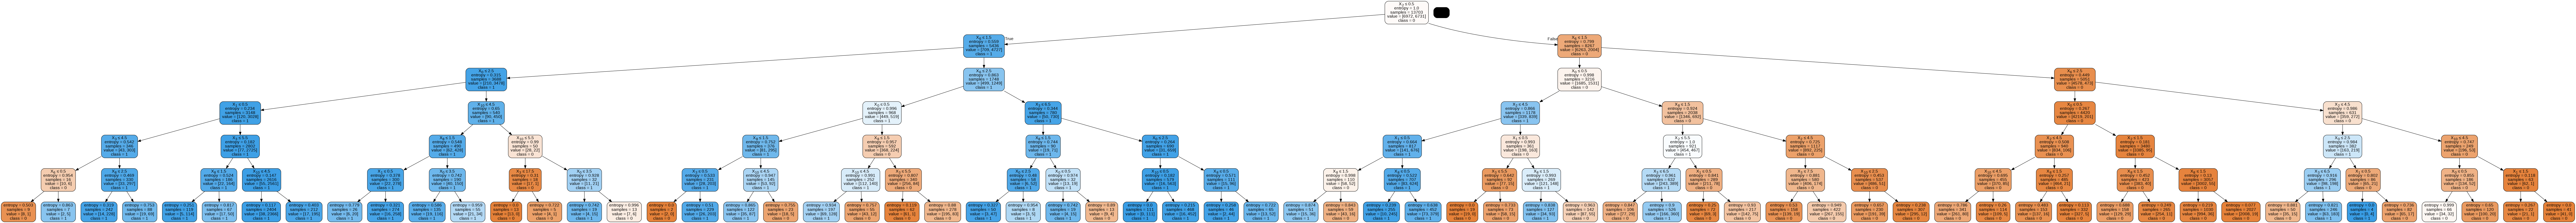

In [ ]:
#Визуализация
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled = True, rounded = True,
                special_characters = True, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('ads.png')
Image(graph.create_png())

### Создадим модель леса из сотни деревьев с целью улучшить точность

Random Forest борется с изъянами Decision Tree путем построения большого количества разных деревьев и их коллективного голосования. 

In [ ]:
from pandas.core.common import random_state
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, max_features="sqrt", max_depth=6, min_samples_split=2, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy on training set: {:.3f}".format(clf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(clf.score(X_test, y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for addition

Accuracy on training set: 0.897
Accuracy on test set: 0.882


Как мы можем видеть, точность на тестовой выборке повысилась с 0.874 до 0.882

# ЧАСТЬ 3

###Посмотрим на качество наших моделей с нормировкой.

KNN - это метрический алгоритм.

Главная идея алгоритма — скажи мне кто твои друзья, и я скажу кто ты :).

В kNN близость точек определяется метрикой, заданной до запуска алгоритма. k-число соседей и метрика, которая задается в пространстве объектов – это гиперпараметры.

Гиперпараметры подбираются до запуска алгоритма и фиксируются на всё время обучения алгоритма -- это те параметры, без которых не получится запустить алгоритм и их нужно выбрать сначала. Есть разные способы выбора гиперпараметров, например, поиск по сетке GridSearch или рандомный поиск RandomizedSearch (это наиболее простые и самые известные методы). Параметры модели оптимизируются в процессе обучения модели (уменьшения функции ошибки).

Полезный факт о нормировании признаков для метрических алгоритмов.

Простейший способ заставить метрические алгоритмы работать хорошо — привести признаки к одному масштабу каким-то линейным преобразованием. Так сохранятся относительные пропорции и масштаб будет одинаковый. Также это может помочь полноценно померить важность признаков. Такое свойство пространства называется изотропностью. То есть полезно для линейных моделей и метрических иметь изотропные пространства (где признаки в одном масштабе).

К одному масштабу данные можно привести каким-то линейный преобразованием (потому что оно обратимое, можно обратно вернуться к тому, что было).


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X_train_scaled, X_test_scaled = X_train.copy(), X_test.copy()

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled, X_test_scaled = [
    scaler.transform(feature_matrix)
    for feature_matrix in (X_train_scaled, X_test_scaled)
]

In [ ]:
clf = KNeighborsClassifier(n_neighbors=10)
clf = clf.fit(X_train_scaled, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/base.py:907: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  self._y = np.empty(y.shape, dtype=np.int)


Видим, что качество улучшилось по сравнению с 0.8558052434456929


In [ ]:
clf.score(X_test_scaled, y_test)

0.8608784473953013

In [ ]:
y_train_predicted = log_reg.predict(X_train_scaled)
y_test_predicted = log_reg.predict(X_test_scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check th

In [ ]:
from sklearn.metrics import f1_score, accuracy_score


def calculate_metrics(y_train, y_train_predicted, y_test, y_test_predicted):
    metics_pd = pd.DataFrame({
        "accuracy": [accuracy_score(y_train, y_train_predicted), 
                     accuracy_score(y_test, y_test_predicted)],
    }, index=["train", "test"])

    # for average in ['macro', 'micro', 'weighted']:
    for average in ['macro']:
        metics_pd[f"f1-{average}"] = [
            f1_score(y_train, y_train_predicted, average=average),
            f1_score(y_test, y_test_predicted, average=average)
        ]

    return metics_pd

In [ ]:
calculate_metrics(y_train, y_train_predicted, y_test, y_test_predicted)

,accuracy,f1-macro
train,0.734028,0.734016
test,0.722983,0.722974


Попробуем то же самое с логистической регрессией

In [ ]:
log_reg = LogisticRegression(max_iter=1000)
log_reg = log_reg.fit(X_train_scaled, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
score = log_reg.score(X_train_scaled, y_train)
score

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


0.8785587794578396

In [ ]:
score = log_reg.score(X_test_scaled, y_test)
score

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


0.8684371807967314

In [ ]:
y_train_predicted = log_reg.predict(X_train_scaled)
y_test_predicted = log_reg.predict(X_test_scaled)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/base.py:283: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check th

In [ ]:
calculate_metrics(y_train, y_train_predicted, y_test, y_test_predicted)

,accuracy,f1-macro
train,0.878559,0.878543
test,0.868437,0.868415


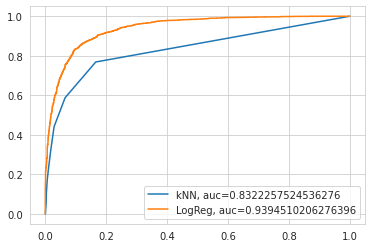

In [ ]:
from sklearn import metrics

y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="kNN, auc="+str(auc))

y_pred_proba = log_reg.predict_proba(X_test_scaled)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="LogReg, auc="+str(auc))

plt.legend(loc=4)
plt.show()

Давайте оценим, как меняется поведение наших моделей с увеличением размера набора данных train.
*   Разделим обучающие данные на 10 равных (почти) частей. Затем обучим модели ( k ближайших соседей, Логистическая регрессия).
*   Построим графики метрик качества accuracy и f1 в части test, изменяя размер набора данных train. Таким образом, оси будут соответствовать размеру набора данных и метрикам качества.
*   Проанализируем окончательный результат.

In [ ]:
models = dict(
    KNeighborsClassifier=KNeighborsClassifier(n_neighbors=10),
    LogisticRegression=LogisticRegression(max_iter=1000),
)

In [ ]:
N_PARTS = 10
part_size = round(X_train_scaled.shape[0] / N_PARTS)
part_sizes = list(range(
    part_size, X_train_scaled.shape[0] + part_size, part_size
))
train_test_subsets = tuple(zip(
    [X_train_scaled[0:size] for size in part_sizes],
    [y_train[0:size] for size in part_sizes],
    [X_test_scaled] * N_PARTS,
    [y_test] * N_PARTS
))

In [ ]:
np.diff(part_sizes)

array([1468, 1468, 1468, 1468, 1468, 1468, 1468, 1468, 1468, 1468])

In [ ]:
from collections import defaultdict
from tqdm.notebook import tqdm

In [ ]:
global_scores = defaultdict(lambda: defaultdict(list))

for model_name, model in tqdm(models.items(), desc='outer'):
    for X_train_subset, y_train_subset, X_test, y_test in train_test_subsets:
        model.fit(X_train_subset, y_train_subset)
        y_train_predicted = model.predict(X_train_subset)
        y_test_predicted = model.predict(X_test)
        
        global_scores[model_name]["f1-macro"].append(f1_score(y_test, y_test_predicted, average="macro"))
        global_scores[model_name]["accuracy"].append(accuracy_score(y_test, y_test_predicted))

In [ ]:
global_scores

defaultdict(<function __main__.<lambda>>,
            {'KNeighborsClassifier': defaultdict(list,
                         {'accuracy': [0.8363636363636363,
                           0.8400408580183861,
                           0.8463738508682329,
                           0.8473953013278857,
                           0.8512768130745659,
                           0.8545454545454545,
                           0.8572012257405516,
                           0.8584269662921349,
                           0.861491317671093,
                           0.8606741573033708],
                          'f1-macro': [0.8363618880512558,
                           0.8400401904350521,
                           0.8463630723779415,
                           0.8473818236047393,
                           0.8512619088642153,
                           0.8545228628396584,
                           0.8571851090900735,
                           0.8584056925984325,
                           0.8614

In [ ]:
def plot_learning_curve(fig, ax, train_subsets_sizes, scores, 
                        metric_names, colors, suptitle, caption,
                        xlabel, ylabel="metric"):
    fig.subplots_adjust(bottom=0.2, top=0.85, wspace=0.1)
    fig.suptitle(suptitle, fontsize=25)
    fig.align_labels(axs=ax)
    fig.text(0.5, 0.025, caption, wrap=True, horizontalalignment='center', fontsize=24)

    for i, metric_name in enumerate(metric_names):
        ax[i].set_title(f"{metric_name} in Test sample", fontsize=22, pad=10)
        ax[i].set_xlabel(xlabel, fontsize=22, labelpad=10)
        ax[i].set_ylabel(ylabel, fontsize=22, labelpad=10)
        ax[i].set_xticks(train_subsets_sizes)
        ax[i].ticklabel_format(style='sci', axis='y')
    ax[0].yaxis.set_label_position("left")
    ax[1].yaxis.set_label_position("right")
    ax[1].yaxis.tick_right()

    for model_name, model_scores in scores.items():
        for i, (metric, scores) in enumerate(model_scores.items()):
            print(model_name, i, metric, scores)
            ax[i].plot(
                train_subsets_sizes, scores, 
                label=model_name, 
                color=colors[model_name],
                marker="*", 
                linewidth=2, 
                markersize=16,
            )
            
            legend = ax[i].legend(loc="bottom right", fontsize=15)
            frame = legend.get_frame()
            frame.set_facecolor("white")
            frame.set_edgecolor("black")

    plt.show()

In [ ]:
len(part_sizes), len(global_scores['KNeighborsClassifier']['accuracy'])

(11, 10)

KNeighborsClassifier 0 f1-macro [0.8363618880512558, 0.8400401904350521, 0.8463630723779415, 0.8473818236047393, 0.8512619088642153, 0.8545228628396584, 0.8571851090900735, 0.8584056925984325, 0.8614698047827085, 0.860657821934655]
KNeighborsClassifier 1 accuracy [0.8363636363636363, 0.8400408580183861, 0.8463738508682329, 0.8473953013278857, 0.8512768130745659, 0.8545454545454545, 0.8572012257405516, 0.8584269662921349, 0.861491317671093, 0.8606741573033708]
LogisticRegression 0 f1-macro [0.867805751154088, 0.8686254829210436, 0.8680164328654638, 0.868415384594835, 0.8688326174324535, 0.8686266454147601, 0.8686288387431033, 0.8694363121416773, 0.869642677656885, 0.868415384594835]
LogisticRegression 1 accuracy [0.8678243105209398, 0.868641470888662, 0.8680286006128702, 0.8684371807967314, 0.8688457609805924, 0.868641470888662, 0.868641470888662, 0.8694586312563841, 0.8696629213483146, 0.8684371807967314]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


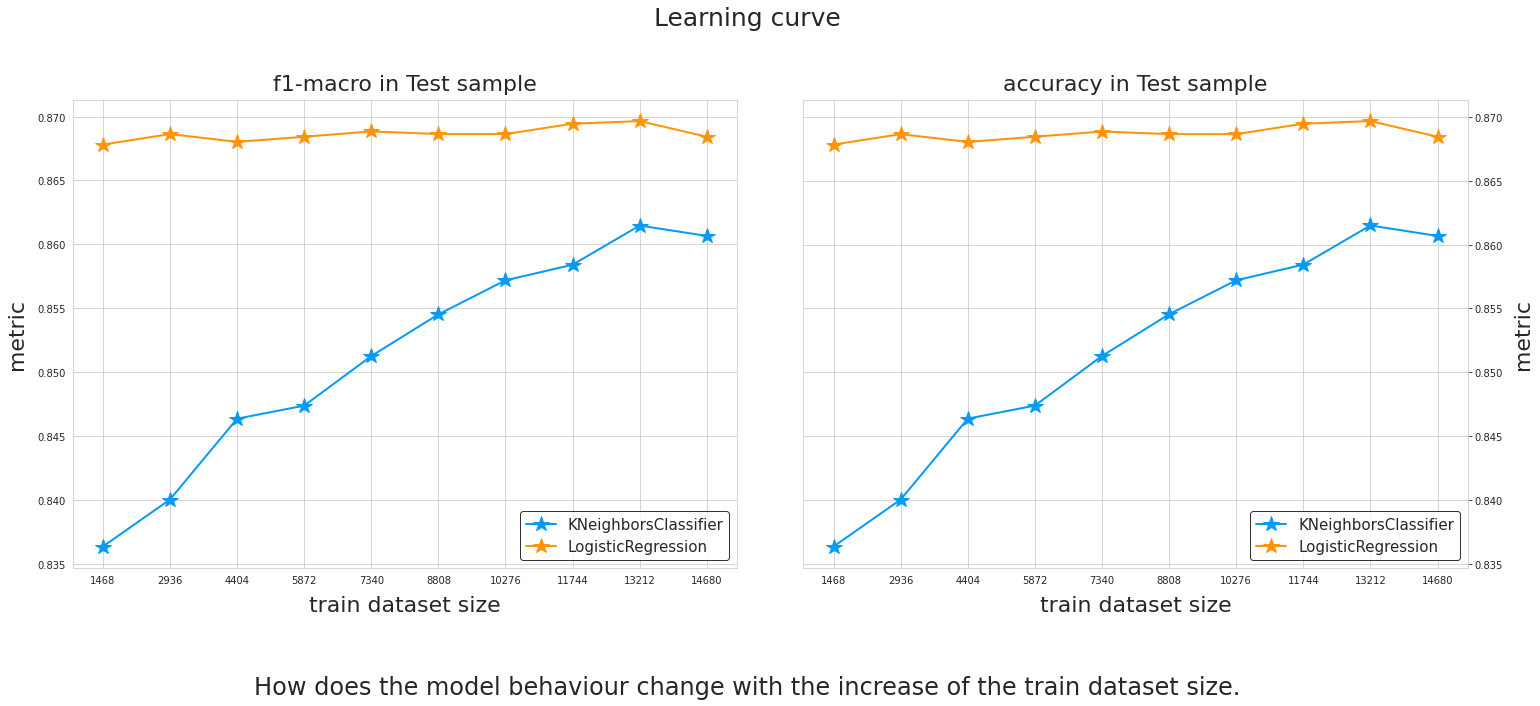

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))
model_names = list(models.keys())
metric_names = list(list(global_scores.values())[0].keys())

plot_learning_curve(fig, ax, part_sizes[:-1], global_scores,
                    metric_names=metric_names,
                    colors={model_names[0]: "xkcd:azure",
                            model_names[1]: "xkcd:tangerine"},
                    suptitle="Learning curve",
                    caption="How does the model behaviour change with "
                            "the increase of the train dataset size.",
                    xlabel="train dataset size")

### Таким образом, наилучшей моделью для предсказания какие пользователи в будущем будут регистрироваться на площадке стала модель Random Forest с результатом на тестовой выборке равным 0.882
